# Graphs

This SageMath notebook plots numerical calculations for the paper *A theory of the dark matter*.

The section numbering follows the paper.  Equation numbers refer to equations in the paper.

## Preamble

In [1]:
%display latex
LE = lambda latex_string: LatexExpr(latex_string);

In [2]:
from mpmath import mp
from mpmath import mpf,mpc
import sage.libs.mpmath.all as a
mp.pretty = True
mp.dps=400
#
binary_precision=mp.prec
Reals = RealField(binary_precision+10)
RealNumber = Reals
myR = Reals

In [3]:
lambdaH = var('lambdaH',latex_name=r"\lambda_H")
gsq = var('gsq',latex_name=r"g^2")
K_EW = var('K_EW',latex_name=r"K_{\mathrm{EW}}")
ahat_EW = var('ahat_EW',latex_name=r"\hat a_{\mathrm{EW}}")
m = var('m')
#m = var('m',latex_name=r"k^2")
K = var('K')
EoverK = var('EoverK',latex_name=r"\frac{E}{K}")


In [4]:
lambdaH_val = 0.5080829235055462
gsq_val= 0.4262847210445738
K_EW_val =  myR(mp.ellipk(mpf(1/2)))
ahat_EW_val = myR(sqrt(6*pi)/(4*K_EW_val))

In [5]:
Kdot = K*(EoverK/(1-m) -1)/2
EoverKdot = EoverK -1/2 -EoverK^2/(2*(1-m))
def dot(fn):
    return m*fn.derivative(m) + Kdot*fn.derivative(K) + EoverKdot*fn.derivative(EoverK)

In [6]:
#
latex_name={}
latex_name['alpha']   = r"\alpha"
latex_name['bsq']     = r"\langle b^2\rangle"
latex_name['musq']   = r"\mu^2"
latex_name['ECGF']   = r"E_{\mathrm{EW}}"
latex_name['ahatsq']   = r"\hat a^2"
latex_name['rhohat']   = r"\hat \rho"
latex_name['ahat']   = r"\hat a"
latex_name['phat'] = r"\hat p"
latex_name['ahat_norm']   = r"\frac{\hat a}{\hat a_{\mathrm{EW}}}"
latex_name['phisq_norm']   = r"\frac{(\phi^\dagger\phi)_0}{v^2/2}"
latex_name['w'] = r"w"
for vstr,form in latex_name.items():
    var(vstr,latex_name=latex_name[vstr])
#

In [7]:
formula={}
formula['alpha']      = ((K/K_EW)*2*(1-m+(2*m-1)*EoverK))^(1/3)
formula['bsq']        = (m-1+EoverK)/alpha^2
formula['musq']       = (1-2*m)/alpha^2
formula['ECGF']       = (m*(1-m)/2)/alpha^4
formula['ahatsq']     = 3*bsq/2 + (4*lambdaH^2/gsq)*musq
formula['rhohat']     = ((3/gsq)*ECGF+(9/(32*lambdaH^2))*bsq^2)/ahatsq^2
formula['phat']     = ((1/gsq)*(ECGF-musq*bsq)-(9/(32*lambdaH^2))*bsq^2)/ahatsq^2
formula['w']         = phat/rhohat
formula['ahat']       = (ahatsq)^(1/2)
formula['ahat_norm']  = ahat/ahat_EW
formula['phisq_norm'] = 1 - (3/2)*bsq/ahatsq
for vstr,form in formula.items():
    pretty_print(LE(latex_name[vstr]),' = ', formula[vstr], hold= True)
    print('\n')

\alpha ' = ' 2^(1/3)*((EoverK*(2*m - 1) - m + 1)*K/K_EW)^(1/3)

\langle b^2\rangle ' = ' (EoverK + m - 1)/alpha^2

\mu^2 ' = ' -(2*m - 1)/alpha^2

E_{\mathrm{EW}} ' = ' -1/2*(m - 1)*m/alpha^4

\hat a^2 ' = ' 4*lambdaH^2*musq/gsq + 3/2*bsq

\hat \rho ' = ' 3/32*(32*ECGF/gsq + 3*bsq^2/lambdaH^2)/ahatsq^2

\hat p ' = ' -1/32*(32*(bsq*musq - ECGF)/gsq + 9*bsq^2/lambdaH^2)/ahatsq^2

w ' = ' phat/rhohat

\hat a ' = ' sqrt(ahatsq)

\frac{\hat a}{\hat a_{\mathrm{EW}}} ' = ' ahat/ahat_EW

\frac{(\phi^\dagger\phi)_0}{v^2/2} ' = ' -3/2*bsq/ahatsq + 1

In [8]:
alpha      = ((K/K_EW)*2*(1-m+(2*m-1)*EoverK))^(1/3)
bsq        = (m-1+EoverK)/alpha^2
musq       = (1-2*m)/alpha^2
ECGF       = (m*(1-m)/2)/alpha^4
ahatsq     = 3*bsq/2 + (4*lambdaH^2/gsq)*musq
rhohat     = ((3/gsq)*ECGF+(9/(32*lambdaH^2))*bsq^2)/ahatsq^2
phat     = ((1/gsq)*(ECGF-bsq*musq)-(9/(32*lambdaH^2))*bsq^2)/ahatsq^2
w           = phat/rhohat
ahat       = (ahatsq)^(1/2)
ahat_norm  = ahat/ahat_EW
phisq_norm = 1 - (3/2)*bsq/ahatsq

In [9]:
def paramsub(vstr):
    temp = eval(vstr).subs(lambdaH=lambdaH_val,gsq=gsq_val,ahat_EW=ahat_EW_val,K_EW=K_EW_val)
    return temp

In [10]:
#
alphan      = paramsub('alpha')
bsqn        = paramsub('bsq')
musqn       = paramsub('musq')
ECGFn       = paramsub('ECGF')
ahatsqn     = paramsub('ahatsq')
rhohatn     = paramsub('rhohat')
phatn     = paramsub('phat')
wn     = paramsub('w')
ahatn       = paramsub('ahat')
ahat_normn  = paramsub('ahat_norm')
phisq_normn = paramsub('phisq_norm')

In [11]:
def msub(v,m_val):
    # v is one of the physical variables, m is a Sage real
#    m_mpf = mpf(m_val)
    m_R = myR(m_val)
    K_val = myR(elliptic_kc(m_R))
    E_val = myR(elliptic_ec(m_R))
    EoverK_val = E_val/K_val
#    print(RDF(m_R),RDF(EoverK_val-1), RDF(E_val-K_val),RDF(K_val-myR(pi)/2))
    temp = v.subs({EoverK:EoverK_val,m:m_R,K:K_val})
    return myR(temp)
def fn(v):
    return lambda marg: msub(v,marg)

In [12]:
t = var('t')
ahat_t = lambda t: fn(ahat_normn)(10^(-t)/2)
w_t   = lambda t: fn(wn)(10^(-t)/2)
phisq_t   = lambda t: fn(phisq_normn)(10^(-t)/2)
#
plt1 = parametric_plot([ahat_t ,w_t],(t,0,56),scale="semilogx")
plt2 = parametric_plot([ahat_t,phisq_t],(t,0,56),scale="semilogx")

In [13]:
anorm=var('anorm')
coeff_low = ahat_EW_val^4 * gsq_val/(lambdaH_val^2)
w_low = lambda anorm: -1+4/(3+anorm^4*coeff_low)
plt3=plot(w_low,(anorm,1e-2,1),scale='semilogx')

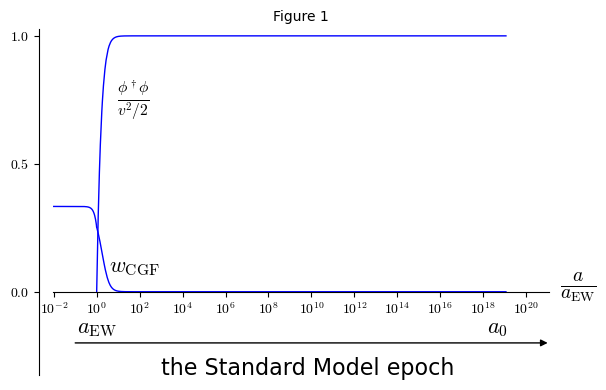

In [14]:
plt=plt1+plt2+plt3
#  +line([(1e-2,1),(100,1)],linestyle=":")\
plt = plt\
+text(r"$w_{\mathrm{CGF}}$",(6e1,.1),fontsize=16,color='black')\
+text(r"$\frac{\phi^\dagger\phi}{v^2/2}$",(5e1,.75),fontsize=16,color='black')\
+text(r"the Standard Model epoch",(10^3,-.3),fontsize=16,color='black',\
      horizontal_alignment='left',fontweight=300)\
+text(r"$a_0$",(4.54e18,-.14),fontsize=16,color='black')\
+text(r"$a_{\mathrm{EW}}$",(1,-.14),fontsize=16,color='black')
#plt.set_aspect_ratio(1)
plt.set_axes_range(xmin=10^(-2),xmax=10^(22),ymin=0)
plt = plt+ arrow((.1,-.2),(10^21,-.2),width=1,arrowsize=2,color='black')
plt.axes_labels([r"$\frac{a}{a_{\mathrm{EW}}}$",""])
plt.axes_labels_size(2)
#plt.axes_labels(["",""])
show(plt,title="Figure 1",\
     ticks=[[10^(-2),1,10^2,10^4,10^6,10^8,10^(10),10^(12),10^(14),10^(16),10^(18),RDF(1.0e20)],[0,1/2,1]],\
     tick_formatter='latex')
plt.save('plots/SMepoch.pdf',dpi=600,\
    ticks=[[10^(-2),1,10^2,10^4,10^6,10^8,10^(10),10^(12),10^(14),10^(16),10^(18),RDF(1.0e20)],[0,1/2,1]],\
     tick_formatter='latex')

### 4.3 $a$ as a function of $k^2$

Figure 1 showing that $a$ increases monotonically from $a_{\mathrm{EW}}$ to $\infty$ as $k^2$ decreases from $\frac12$ to 0.

In [15]:
y=-(dot(ahatsq)/ahatsq)
yn = paramsub('y')

In [16]:
plt=plot(fn(yn),m,1e-8,0.5)

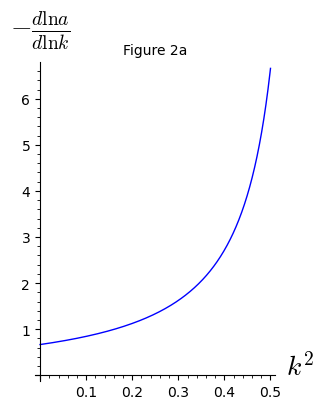

In [17]:
plt.set_axes_range(ymin=0)
plt.set_aspect_ratio(0.1)
plt.axes_labels([r"$k^2$",r"$-\frac{d \ln a}{d\ln k}$"])
plt.axes_labels_size(2)
show(plt,title="Figure 2a")
plt.save('plots/aofkmonotonic.pdf',dpi=600)

In [18]:
plt = parametric_plot([fn(ahat_normn),m],(m,1e-5,0.5),scale="loglog")

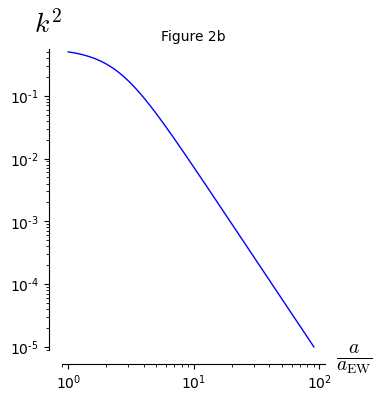

In [19]:
plt.set_aspect_ratio(0.5)
plt.set_axes_range(xmin=1,xmax=100,ymax=0.5)
plt.axes_labels([r"$\frac{a}{a_{\mathrm{EW}}}  $",r"$k^2$"])
plt.axes_labels_size(2)
plt.show(title="Figure 2b")
plt.save('plots/ksqofa.pdf',dpi=600)

### 5.2 w_CGF=0

Figure 2 shows $w_{\mathrm{CGF}}$ and the progress of the electroweak transition in the first 2 ten-folds of expansion after $a_{\mathrm{EW}}$.

In [20]:
plt1 = parametric_plot([fn(ahat_normn),fn(wn)],(m,1e-6,0.5),scale="semilogx")
plt2 = parametric_plot([fn(ahat_normn),fn(phisq_normn)],(m,1e-6,0.5),scale="semilogx")

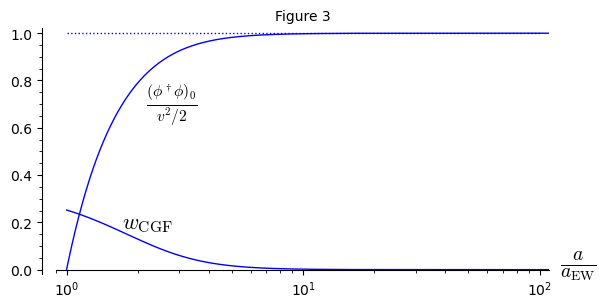

In [21]:
plt=plt1+plt2\
+line([(1,1),(100,1)],linestyle=":")\
+text(r"$w_{\mathrm{CGF}}$",(2.2,.2),fontsize=16,color='black')\
+text(r"$\frac{(\phi^\dagger\phi)_0}{v^2/2}$",(2.8,.7),fontsize=16,color='black')
plt.set_aspect_ratio(1)
plt.set_axes_range(xmin=1,xmax=100)
plt.axes_labels([r"$\frac{a}{a_{\mathrm{EW}}}$",""])
plt.axes_labels_size(2)
show(plt,title="Figure 3")
plt.save('plots/wandphisq.pdf',dpi=600)

### 5.4 CGF equation of state

In [22]:
y=(dot(rhohat)/rhohat)
yn = paramsub('y')

In [23]:
plt=plot(fn(yn),m,1e-8,0.5)

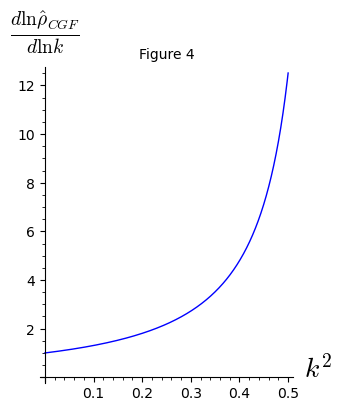

In [24]:
plt.set_axes_range(ymin=0)
plt.set_aspect_ratio(0.05)
plt.axes_labels([r"$k^2$",r"$\frac{d \ln \hat\rho_{CGF}}{d\ln k}$"])
plt.axes_labels_size(2)
show(plt,title="Figure 4")
plt.save('plots/rhoofkmonotonic.pdf',dpi=600)

### 5.5 Adiabatic condition for $a\ge a_{\mathrm{EW}}$

Figure 4 showing a bound on the ratio of time scales, verifying the adiabatic condition.

In [25]:
r_gH= 2.6387686437244608e-33
r_HH= 1.3207956122976951e-88
Omega_Lambda = 0.685
pretty_print(LE(r"r_{\mathrm{gH}}=\frac{t_{\mathrm{grav}}^2}{t_{\mathrm{Higgs}}^2}="),\
             RDF(r_gH),LE(r"\qquad r_{\mathrm{HH}}=\frac{t_{\mathrm{Higgs}}^2}{t_{\mathrm{Hubble}}^2}="),RDF(r_HH),\
            LE(r"\qquad \Omega_\Lambda="),RDF(Omega_Lambda))

r_{\mathrm{gH}}=\frac{t_{\mathrm{grav}}^2}{t_{\mathrm{Higgs}}^2}= 2.6387686437244608e-33 \qquad r_{\mathrm{HH}}=\frac{t_{\mathrm{Higgs}}^2}{t_{\mathrm{Hubble}}^2}= 1.3207956122976951e-88 \qquad \Omega_\Lambda= 0.685

In [26]:
bound = 4*K*alpha*sqrt(r_gH*ahatsq*rhohat/3 + r_HH*Omega_Lambda*ahatsq)
boundn = paramsub('bound')

In [27]:
plt= parametric_plot((fn(ahat_normn),fn(boundn)),(m,5e-7,0.5),scale="loglog")

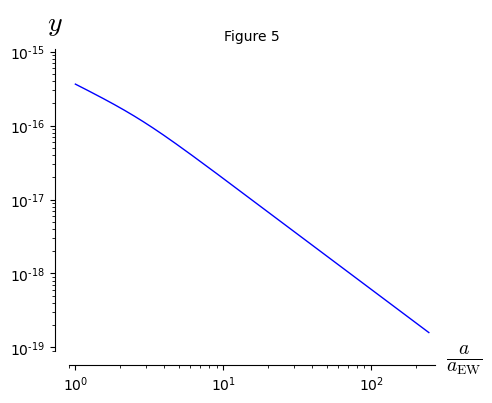

In [28]:
plt.set_aspect_ratio(.5)
plt.set_axes_range(ymax=1e-15,ymin=1e-19)
plt.axes_labels([r"$\frac{a}{a_{\mathrm{EW}}}  $",r"$y$"])
plt.axes_labels_size(2)
show(plt,title="Figure 5")
plt.save('plots/adiabaticbound.pdf',dpi=600)

### 6.4 Temperature after $a_{\mathrm{EW}}$

CGF temperature  $\qquad k_{\mathrm{B}} T_{\mathrm{CGF}} = \frac{\hbar}{4 K' \alpha a}= \frac{m_{\mathrm{Higgs}}}{4 K' \alpha \hat a}$

redshifted to the present $\qquad k_{\mathrm{B}} T_{\mathrm{rs}}=\frac{a}{a_0} k_B T_{\mathrm{CGF}} = \frac{m_{\mathrm{Higgs}}}{4 K' \alpha \hat a_0}$

use numbers from the Arithmetic notebook and from above

In [29]:
T_CMB = mpf(2.7255) # K
K_EW_mpf = mp.ellipk(1/2)
m_Higgs_mpf= mpf(125.1)    # GeV
kB_mpf = mpf(8.61733326214518e-14)  # GeV/K
ahat0_mpf = mpf(2.6592893046343716e18)   # s
ahat_EW_mpf = mpf(0.5854143283037644)   # s
lambda_mpf = mpf(lambdaH_val)
gsq_mpf = mpf(gsq_val)      # g^2

define functions in mpmath

In [30]:
def kT_CGF(ma):
    m=mpf(ma)
    K = mp.ellipk(m)
    Kp = mp.ellipk(1-m)
    E = mp.ellipe(m) 
    EoverK = E/K
    alpha = mp.power( (K/K_EW_mpf)*2*(1-m+(2*m-1)*EoverK) ,1/3)
    ahatsq = ((3/2)*(m-1+EoverK)+(4*lambda_mpf^2/gsq_mpf)*(1-2*m))/alpha^2
    ahat = mp.sqrt(ahatsq)
    return m_Higgs_mpf/(4*Kp*alpha*ahat)
def T_rs(ma):
    m=mpf(ma)
    K = mp.ellipk(m)
    Kp = mp.ellipk(1-m)
    E = mp.ellipe(m) 
    EoverK = E/K
    alpha = mp.power( (K/K_EW_mpf)*2*(1-m+(2*m-1)*EoverK) ,1/3)
    return m_Higgs_mpf/(4*Kp*alpha*ahat0_mpf*kB_mpf)
def ahat_over_ahat0_mp(ma):
    m=mpf(ma)
    K = mp.ellipk(m)
    E = mp.ellipe(m) 
    EoverK = E/K
    alpha = mp.power( (K/K_EW_mpf)*2*(1-m+(2*m-1)*EoverK) ,1/3)
    ahatsq = ((3/2)*(m-1+EoverK)+(4*lambda_mpf^2/gsq_mpf)*(1-2*m))/alpha^2
    ahat = mp.sqrt(ahatsq)
    return ahat/ahat_EW_mpf


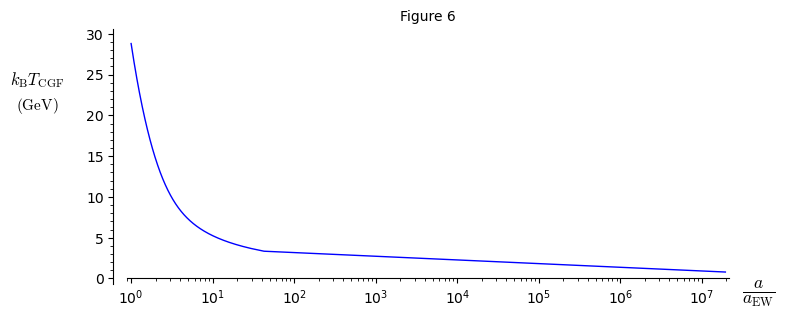

In [31]:
plt=parametric_plot((ahat_over_ahat0_mp,kT_CGF),(m,1e-21,0.5),scale="semilogx")
plt.set_aspect_ratio(.1)
plt.set_axes_range(ymin=0,ymax=30,xmin=1,xmax=1e7)
yaxis_label = Graphics()+text(r"$ k_\mathrm{B} T_{\mathrm{CGF}}$",(-0.15,0.80),axis_coords=True,fontsize=12,color='black')
yaxis_label += text(r"$ (\mathrm{GeV})$",(-0.15,0.70),axis_coords=True,fontsize=11,color='black')
xaxis_label = Graphics()+text(r"$\frac{a}{a_{\mathrm{EW}}}  $",(1.05,-0.04),axis_coords=True,fontsize=18,color='black')
plt2 =  plt+yaxis_label+xaxis_label
plt.axes_labels_size(2)
show(plt2,title="Figure 6",figsize=[8,20],ymax=30,xmin=1)
plt2.save('plots/kT_after_a_EW.pdf',figsize=[8,20],ymax=30,xmin=1,dpi=600)

Solve $T_{\mathrm{rs}}(k^2) = T_{\mathrm{CMB}}$

In [32]:
m_dc=mp.findroot(lambda ma: T_rs(ma)-T_CMB,1e-17,solver='anewton')
T_rs_dc=T_rs(m_dc)
ahatnorm_dc = ahat_over_ahat0_mp(m_dc)
kT_dc = kT_CGF(m_dc)

In [33]:
pretty_print(\
    LE(r"k^2 =  "), RDF(m_dc).n(prec=20),\
    LE(r"\qquad \frac{a}{a_0} k_B T_{\mathrm{CGF}} = "),RDF(T_rs_dc).n(prec=20),LE(r"\,\mathrm{K}"),\
    LE(r"\qquad \frac{a}{a_0} =  "),RDF(ahatnorm_dc).n(prec=20),\
    LE(r"\qquad k_B T_{\mathrm{CGF}} =  "),RDF(kT_dc).n(prec=20),LE(r"\,\mathrm{GeV}"))


k^2 =   5.1168e-18 \qquad \frac{a}{a_0} k_B T_{\mathrm{CGF}} =  2.7255 \,\mathrm{K} \qquad \frac{a}{a_0} =   1.1305e6 \qquad k_B T_{\mathrm{CGF}} =   0.94371 \,\mathrm{GeV}